In [1]:
import numpy as np
import pandas as pd 
import pandas_profiling
import matplotlib.pyplot as plt
import sklearn.datasets as ds
%matplotlib inline

### 2. Read Data
`load_boston().target`should be added to the dataframe as a feature column. Each additional feature can be important for the clustering

In [2]:
boston = ds.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['Value'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 3. Profiling
This is an elementary form of profiling. A more thorough way would be using [pandas profiling](https://github.com/pandas-profiling/pandas-profiling)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Value      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [4]:
pandas_profiling.ProfileReport(df)

Number of variables,14
Number of observations,506
Total Missing (%),0.0%
Total size in memory,55.4 KiB
Average record size in memory,112.2 B
Numeric,12
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,1


### 4. Transformation

#### 4.1 Encoding
Luckily enough, the only categorical variable `CHAS`is already correctly encoded. No further action required.

In [5]:
df.CHAS.unique()

array([0., 1.])

#### 4.2 Scaling
This is an extremely important data preparation step for clustering!

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
stdsc = StandardScaler()
hd_sc = stdsc.fit_transform(df)

In [8]:
hd_sc[:5]

array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ,  0.15968566],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937, -0.10152429],
       [-0.41734159, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         1.28271368, -0.26581176,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.39642699, -1.2087274 ,  1.32424667],
       [-0.41675042, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.01630251, -0.80988851,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.41616284, -1.36151682,  1.18275795],
       [-0.41248185, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.22857665, -0.51117971,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.44

#### 4.3 PCA
This is to find the two (transformed) components which contribute the most to explaining variance.

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca_reducer = PCA(n_components=2)
reduced_data = pca_reducer.fit_transform(hd_sc)

In [11]:
reduced_data[:5]

array([[-2.08734396,  0.49286178],
       [-1.3733816 , -0.17091659],
       [-2.37655329,  0.9140211 ],
       [-2.83777919,  0.19485342],
       [-2.77291528,  0.43327892]])

In [12]:
reduced_data.shape

(506, 2)

### 5. Clustering and Visualization

In [13]:
from sklearn.cluster import KMeans

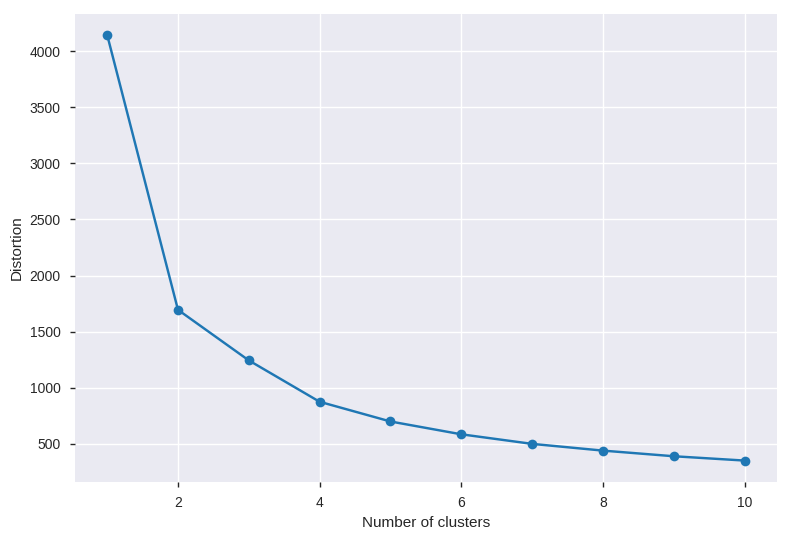

In [14]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(reduced_data)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions , marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('./figures/elbow.png', dpi=300)
plt.show()

So, the optimal number of clusters is between 2 and 4. It might make sense to try out all of these possibilities and to interpret the corresponding results in order to come up with a suitable characterization of the clusters found.

__Remark:__ When using pandas profiling, the plots are automatically done with seaborn!

## Performing the Clustering
Here, we will try out 2,3, and 4 as the optimal number of clusters, look at the results and write a conclusion which builds upon the insights gained from the respective previous pass(es).

In [15]:
ncl_opt = 4
km = KMeans(n_clusters=ncl_opt)
cluster = km.fit_predict(reduced_data)

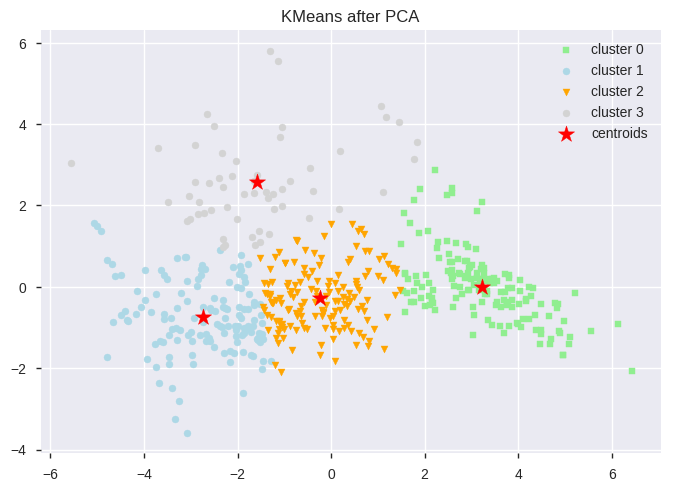

In [16]:
# this provides enough opportunities for up to five clusters
clustcolors = ['lightgreen','lightblue','orange','lightgray','yellow']
clustmarkers = ['s','o','v','o','s']
for i in range(0,ncl_opt):
    plt.scatter(reduced_data[cluster==i, 0], reduced_data[cluster==i, 1], 
                s = 25, 
                c = clustcolors[i], 
                marker = clustmarkers[i], 
                label = 'cluster '+str(i)
    )

plt.scatter(km.cluster_centers_[:,0], 
            km.cluster_centers_[:,1], 
            s=150, 
            marker='*', 
            c='red', 
            label='centroids')
plt.title("KMeans after PCA")
plt.legend()
plt.show()

In [17]:
km.cluster_centers_

array([[ 3.23031433,  0.00681203],
       [-2.73275486, -0.74043364],
       [-0.22975617, -0.27245256],
       [-1.57971255,  2.57299547]])

__Applying the clustering to the original data__ This is easily achieved, since the array `cluster` contains the cluster labels for the various rows of data we read in, so:

In [18]:
cluster

array([1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 2, 2, 1, 2, 1, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 3, 3, 3, 1, 3, 3, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3,
       3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 2, 3, 3, 3, 3, 2, 3, 3, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 2, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1, 3, 1, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,

In [19]:
cluster==1

array([ True, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [20]:
df[cluster==1].head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
39,0.02763,75.0,2.95,0.0,0.428,6.595,21.8,5.4011,3.0,252.0,18.3,395.63,4.32,30.8
40,0.03359,75.0,2.95,0.0,0.428,7.024,15.8,5.4011,3.0,252.0,18.3,395.62,1.98,34.9
41,0.12744,0.0,6.91,0.0,0.448,6.770,2.9,5.7209,3.0,233.0,17.9,385.41,4.84,26.6
42,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81,25.3
43,0.15936,0.0,6.91,0.0,0.448,6.211,6.5,5.7209,3.0,233.0,17.9,394.46,7.44,24.7


### 6. Analysis and Interpretation

In [21]:
for i in range(0,ncl_opt):
    custclust = df[cluster==i]
    print("Cluster {:d}".format(i+1))
    print("Average Crime Rate per Capita in cluster {:d}: {}".
          format(i+1,round(np.array(custclust['CRIM']).mean(),2)))
    print("Average number of rooms in cluster {:d}: {}".
          format(i+1,round(np.array(custclust['RM']).mean(),2)))
    print("Average percent of lower class population {:d}: {}".
          format(i+1,round(np.array(custclust['LSTAT']).mean(),2)))
    print("Average ratio of students to teachers {:d}: {}".
          format(i+1,round(np.array(custclust['PTRATIO']).mean(),2)))
    print("Average distance to employment centers {:d}: {}".
          format(i+1,round(np.array(custclust['DIS']).mean(),2)))
    print("Number of areas near the Charles River {:d}: {}".
          format(i+1,np.array(custclust['CHAS']).sum()))
    print("Average median price (in $1000s) in cluster {:d}: {}".
          format(i+1,round(np.array(custclust['Value']).mean(),2)))
    print("Deviation from the mean median price (in $1000s) in cluster {:d}: {}".
          format(i+1,round(np.array(custclust['Value']).std(),2)))
    print("In cluster {:d} we have {} houses".format(i+1,custclust.shape[0]))
    print('\n')

Cluster 1
Average Crime Rate per Capita in cluster 1: 10.76
Average number of rooms in cluster 1: 5.91
Average percent of lower class population 1: 19.66
Average ratio of students to teachers 1: 19.77
Average distance to employment centers 1: 1.96
Number of areas near the Charles River 1: 7.0
Average median price (in $1000s) in cluster 1: 15.34
Deviation from the mean median price (in $1000s) in cluster 1: 6.23
In cluster 1 we have 156 houses


Cluster 2
Average Crime Rate per Capita in cluster 2: 0.08
Average number of rooms in cluster 2: 6.53
Average percent of lower class population 2: 6.99
Average ratio of students to teachers 2: 17.5
Average distance to employment centers 2: 6.36
Number of areas near the Charles River 2: 0.0
Average median price (in $1000s) in cluster 2: 26.66
Deviation from the mean median price (in $1000s) in cluster 2: 6.64
In cluster 2 we have 139 houses


Cluster 3
Average Crime Rate per Capita in cluster 3: 0.56
Average number of rooms in cluster 3: 6.05
Ave

### Conclusion:

For `ncl_opt = 2`, there are 2 distinct clusters of residential areas in Boston. Cluster 1 has a much higher crime rate, less number of rooms, higher percentage of lower class population and as such has much cheaper housing prices. In Cluster 2 the housing values increases, while all the mentioned variables are reversed. Even the proximity to the Charles River seems to favor higher housing values, while, surprisingly, the further way from employment centers, the higher the real estate prices.

For `ncl_opt = 3`, there are 3 distinct clusters of residential areas in Boston. Again, one of the clusters is dominated by the crime rate, while for the other two the distinction seems to lie mainly in their being "suburban" (i.e. away from the Charles River and the employment centers) or "central" (i.e. with better access to the river and closer to the employment centers). Interestingly, when you look at the two clusters with a low crime rate, you can see that they differ greatly also in the percentage of lower class people. Therefore, the common misconception / prejudice of _lower class = high probability for crime_ clearly does not hold.

The latter is emphasized once more when looking at 4 clusters. Also, the additional cluster now clearly separates suburban areas from central areas, since there is now a cluster with no access to the Charles river and an average distance of more than 6 miles from the employment centers as opposed to the two comparatively central clusters, which are mainly distinguished by the high median price, high number of rooms and low percentage of lower class people as opposed to the relatively low median price, low number of rooms and high percentage of lower class people in the second one.

All in all, it seems that "downtown" (i.e. close to the employment centers) we can expect a high crime rate and lower housing prices, while in a medium distance from the centers there are two distinct types fo living areas, namely high-value higher-class ("priviledged belt") and lower to medium-value medium-class ("opportunity belt") neighborhoods. The "suburban" neighborhoods then have medium to high-value higher-class characteristics.

### 7. Matching to CRISP-DM

In steps 2 and 3, we started right away with *Data Understanding* by reading in the (single) source of data and profiling it. Step 4 corresponds to *Data Preparation* and step 5 would be *Modeling*. In step 6 we perform the *Interpretation / Evaluation*.

*Business Understanding* was explained briefly in the summary of the Scenario of this Mini Project. What we have not gone through is *Deployment*, meaning that we do not really know *what* to make of the results...

So, very briefly, this is what these phases might contain.

### Deployment
So the real question is, how can we use this in our business? We have seen that there are up to four distinct clusters to work with in Boston. As per the introduction to this project, we try to aim for cheap houses in underprivileged areas to increase their value. For an investor with affinity to risk, the "downtown" cluster offers plenty of opportunity. A risk-averse investor might want to favor the cluster which may be describes as "opprtunity belt". After all, the development of the housing prices cannot be predicted with certainty.